# CLEVELAND LOLLIPOP CHART

In [1]:
from matplotlib import font_manager
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

## Import fonts

In [2]:
# Percorsi del font
font_path_regular = '/Users/alfonsomarino/Desktop/Teko/static/Teko-Regular.ttf'
font_normal = font_manager.FontProperties(fname=font_path_regular)

font_path_med = "/Users/alfonsomarino/Desktop/Teko/static/Teko-Medium.ttf"
font_med = font_manager.FontProperties(fname = font_path_med)

font_path_semi = "/Users/alfonsomarino/Desktop/Teko/static/Teko-SemiBold.ttf"
font_semi = font_manager.FontProperties(fname = font_path_semi)

## Import dataset excel

In [3]:
df = pd.read_csv('/Users/alfonsomarino/Desktop/Progetti/Campionato/Cleveland chart/data/NunoTavares.csv', header = [1]) 
df.head(5)

,Rk,Player,Ast,xA,xAG,Season,Age,Nation,Team,Comp,...,npxG/Sh,Sh,G/Sh,G/SoT,SoT,SoT%,Dist,FK,Pos,-9999
0,1,Nuno Tavares,8,2.4,2.6,2024-2025,24,pt POR,Lazio,it Serie A,...,0.05,13,0.00,0.00,2,15.4,25.3,2,DF,a65c844b
1,2,Bukayo Saka,7,3.2,3.5,2024-2025,22,eng ENG,Arsenal,eng Premier League,...,0.08,27,0.11,0.25,12,44.4,16.1,0,MFFW,bc7dc64d
2,3,Raphinha,6,3.5,6.5,2024-2025,27,br BRA,Barcelona,es La Liga,...,0.18,35,0.17,0.43,14,40.0,20.0,5,FWMF,3423f250
3,4,Lamine Yamal,6,2.6,5.0,2024-2025,17,es ESP,Barcelona,es La Liga,...,0.09,35,0.14,0.38,13,37.1,20.2,0,FW,82ec26c1
4,5,João Neves,6,2.5,2.1,2024-2025,19,pt POR,Paris S-G,fr Ligue 1,...,0.08,9,0.11,0.50,2,22.2,14.3,0,MF,c2a15a27


In [4]:
df = df.head(23)

In [5]:
df = df.sort_values(by='Ast', ascending=True)

## Visualization

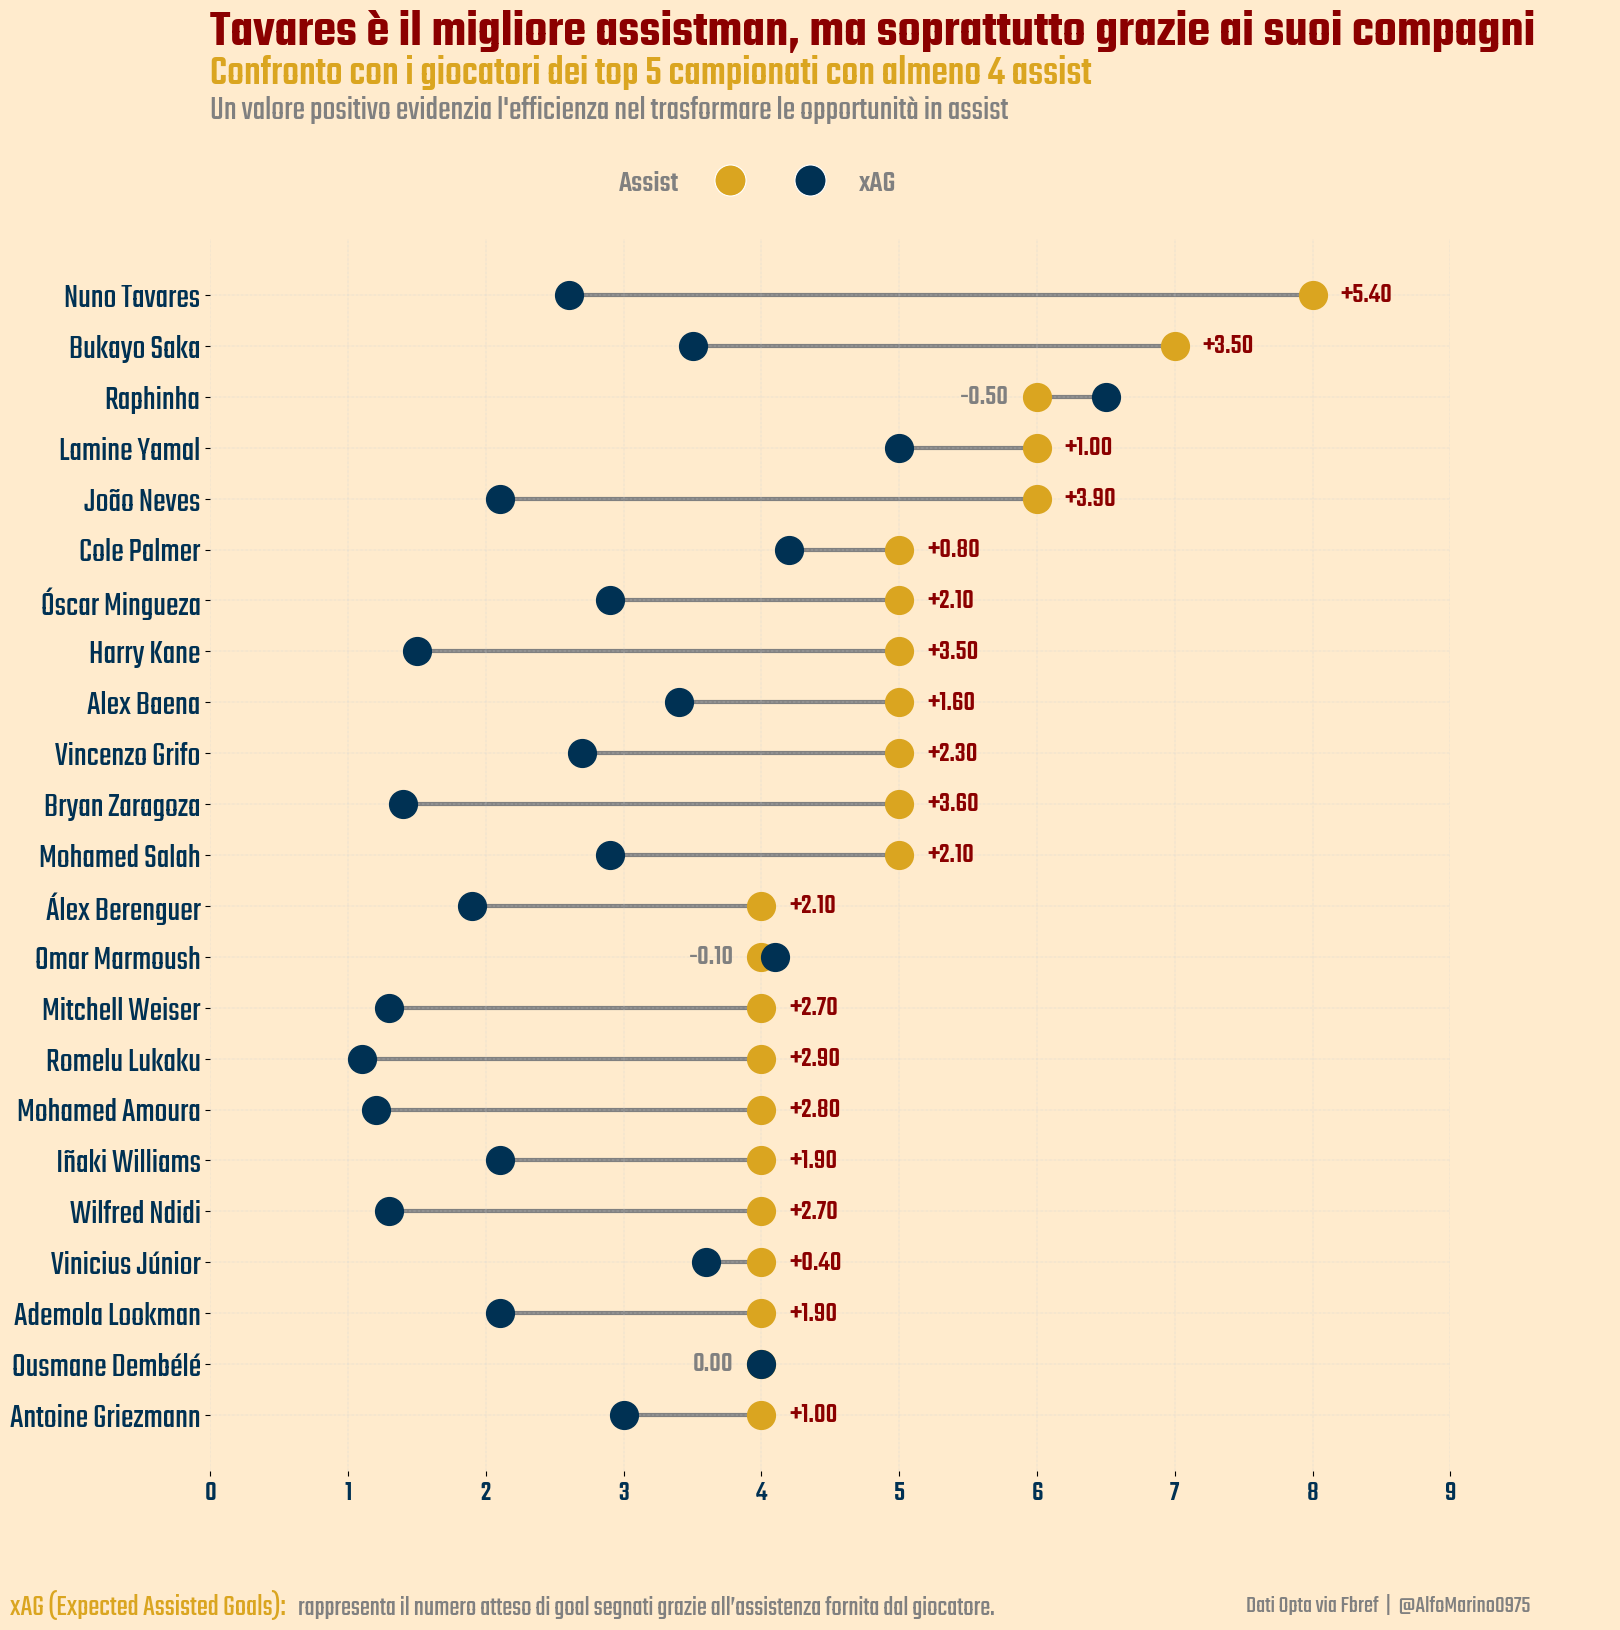

In [23]:
# Creazione della figura
fig, ax = plt.subplots(figsize=(16, 16), facecolor='blanchedalmond')
ax.set_facecolor('blanchedalmond')

# Creazione del Cleveland chart
for i in range(len(df)):
    ax.plot([df['Ast'].iloc[i], df['xAG'].iloc[i]], 
            [i, i], color='gray', linewidth=3, zorder=1)

ax.scatter(df['Ast'], range(len(df)), color='goldenrod', label='Ast', s=400, zorder = 2)
ax.scatter(df['xAG'], range(len(df)), color='#003153', label='xAG', s=400, zorder = 2)

# Nascondere l'asse in alto e a destra
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Schiarire la griglia
ax.grid(True, color="lightgrey", linestyle='dashdot', linewidth=0.3, zorder = 0)

plt.suptitle("Confronto con i giocatori dei top 5 campionati con almeno 4 assist", 
             fontproperties=font_med, fontsize=30, color="goldenrod", 
             x=0.125, y=0.995, ha="left")

# Imposta il sottotitolo allineato a sinistra
plt.title("Tavares è il migliore assistman, ma soprattutto grazie ai suoi compagni", 
          fontproperties=font_semi, fontsize=38, color="darkred", 
          pad=140, loc="left")

#plt.suptitle("Confronto con i giocatori dei top 5 campionati con almeno 4 assist", fontproperties=font_med, fontsize=30, color="goldenrod", y = 1, x=0.5)
#plt.title("Tavares è il migliore assistman, ma soprattutto grazie ai suoi compagni", fontproperties=font_semi, fontsize=38, color="darkred", pad=140)
plt.yticks(range(len(df)), df['Player'], fontproperties=font_normal, fontsize=25, color='#003153')
plt.xticks(range(0, 10, 1), fontproperties=font_med, fontsize=20, color='#003153')

# Aggiunta della legenda personalizzata
ax1 = fig.add_axes([0, 0.9, 1, .1])
ax1.set_facecolor("blanchedalmond")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_axis_off()

ax1.text(x = 0.125, y = 0.55, s = "Un valore positivo evidenzia l'efficienza nel trasformare le opportunità in assist", 
         fontproperties=font_normal, fontsize=25, color="gray")

ax1.text(x=0.38, y=0.1, s="Assist", fontproperties=font_med, fontsize=22, color="gray")
ax1.scatter(x=0.45, y=0.17, s=500, color="goldenrod", edgecolor='white', linewidth=.8)

ax1.text(x=0.53, y=0.1, s="xAG", fontproperties=font_med, fontsize=22, color="gray")
ax1.scatter(x=0.50, y=0.17, s=500, color="#003153", edgecolor='white', linewidth=.8)

fig.text(0.95, 0.02, 'Dati Opta via Fbref  |  @AlfoMarino0975', fontproperties=font_normal, fontsize=18, color='gray', 
         ha='right', va='bottom')

fig.text(0.0, 0.02, 'xAG (Expected Assisted Goals):', fontproperties=font_normal, fontsize=22, ha='left', color = "goldenrod")
fig.text(0.18, 0.02, 'rappresenta il numero atteso di goal segnati grazie all’assistenza fornita dal giocatore.', fontproperties=font_normal, fontsize=20, ha='left', color = "grey")

# Annotare il valore differenziale accanto agli assist
for i in range(len(df)):
    # Valore differenziale
    diff_value = df['A-xAG'].iloc[i]
    
    # Aggiungere il segno + se positivo
    if diff_value > 0:
        diff_text = f'+{diff_value:.2f}'
        xytext = (20, -5)  # Spostamento a destra (aumentato)
        color = 'darkred'  # Colore per valori positivi
    else:
        diff_text = f'{diff_value:.2f}'  # Valore negativo senza +
        xytext = (-20, -5)  # Spostamento a sinistra (aumentato)
        color = 'gray'  # Colore per valori negativi

    # Posizionare il valore accanto al punto degli assist
    ax.annotate(diff_text, 
                (df['Ast'].iloc[i], i), 
                textcoords="offset points", 
                xytext=xytext,  # Spostamento in base al segno
                ha='left' if diff_value > 0 else 'right', 
                fontproperties=font_med, fontsize=20, color=color)  # Colore variabile


plt.savefig('/Users/alfonsomarino/Desktop/cleveland_assist.png', dpi=300, bbox_inches='tight')

# Mostra il grafico
plt.show()